## 1.Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats

## About the Dataset

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes. Here, we have independent features such as horsepower, weight, displacement, accleration, model_year, origin etc and dependent variable as mpg of the automobile.since the labels are provided and they are continous variables,it can be thought of as a regression problem.

#### Attribute Information

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

## load file as csv

In [2]:
filename = r"C:\Users\sadhana\Downloads\car.csv"

In [3]:
headers=["mpg","Cylinders","displacement","horsepower","weight","accleration","model_year","car_name"]
df = pd.read_csv(filename , names = headers)
df.head()

,mpg,Cylinders,displacement,horsepower,weight,accleration,model_year,car_name
0,18.0,8,307.0,130,3504,12.0,70,"1\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,"1\t""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,"1\t""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,"1\t""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,"1\t""ford torino"""


## 2.Data Preprocessing

In [4]:
# separating the origin and car_name values in different columns
df[["origin","car_name"]] = df["car_name"].str.split("\t",expand= True) 

In [5]:
df.head()

,mpg,Cylinders,displacement,horsepower,weight,accleration,model_year,car_name,origin
0,18.0,8,307.0,130,3504,12.0,70,"""chevrolet chevelle malibu""",1
1,15.0,8,350.0,165,3693,11.5,70,"""buick skylark 320""",1
2,18.0,8,318.0,150,3436,11.0,70,"""plymouth satellite""",1
3,16.0,8,304.0,150,3433,12.0,70,"""amc rebel sst""",1
4,17.0,8,302.0,140,3449,10.5,70,"""ford torino""",1


### Evaluating for missing values

In [6]:
# replacing the "?" values with np.nan values
df.replace("?",np.nan, inplace = True) 

In [7]:
# checking the missing values
missing_data = df.isnull()
missing_data.head()

,mpg,Cylinders,displacement,horsepower,weight,accleration,model_year,car_name,origin
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


Counting missing values in each column

In [8]:
for column in missing_data.columns.values.tolist():
    print (column)
    print(missing_data[column].value_counts())
    print("")

mpg
False    398
Name: mpg, dtype: int64

Cylinders
False    398
Name: Cylinders, dtype: int64

displacement
False    398
Name: displacement, dtype: int64

horsepower
False    392
True       6
Name: horsepower, dtype: int64

weight
False    398
Name: weight, dtype: int64

accleration
False    398
Name: accleration, dtype: int64

model_year
False    398
Name: model_year, dtype: int64

car_name
False    398
Name: car_name, dtype: int64

origin
False    398
Name: origin, dtype: int64



Horsepower has 6 missing values, Lets fill them with 0 values.

In [9]:
df["horsepower"].fillna(0, inplace=True)

#### Correct Data format

In [10]:
df.dtypes

mpg             float64
Cylinders         int64
displacement    float64
horsepower       object
weight            int64
accleration     float64
model_year        int64
car_name         object
origin           object
dtype: object

The datatype of horsepower and origin are object datatype which needs to be converted to integer datatype

In [11]:
df[["horsepower","origin"]]=df[["horsepower","origin"]].astype(int)
df.dtypes

mpg             float64
Cylinders         int64
displacement    float64
horsepower        int32
weight            int64
accleration     float64
model_year        int64
car_name         object
origin            int32
dtype: object

In [12]:
df.shape   # shape of dataframe

(398, 9)

#### checking for unique values

In [13]:
print("Cylinders:",df["Cylinders"].unique())
print("Origin:",df["origin"].unique())
print("Model_year",df["model_year"].unique())

Cylinders: [8 4 6 3 5]
Origin: [1 3 2]
Model_year [70 71 72 73 74 75 76 77 78 79 80 81 82]


## 3. Analyzing Individual Features Patterns using visualization

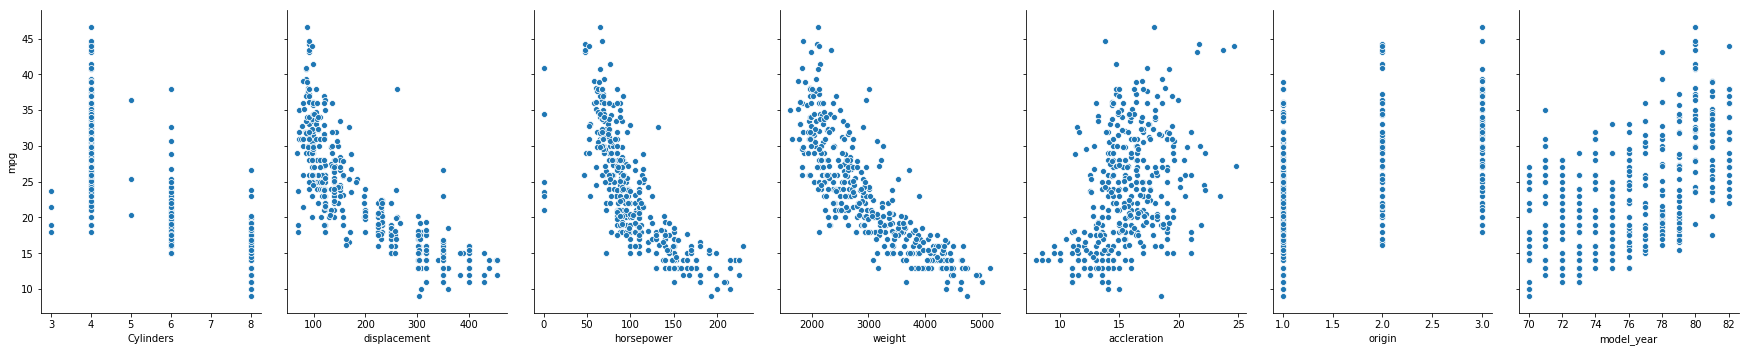

In [14]:
sns.pairplot(df, x_vars=["Cylinders","displacement","horsepower","weight","accleration","origin","model_year"], y_vars='mpg', height=5, aspect=0.7)

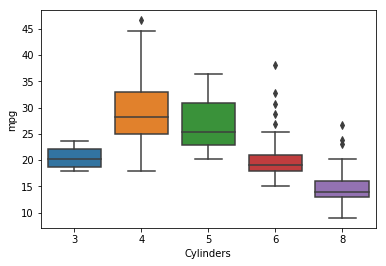

In [15]:
#Creating a box plot for cylinders and mpg
sns.boxplot(x="Cylinders",y="mpg",data=df)

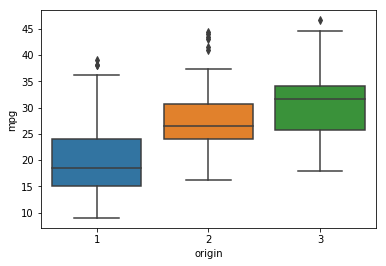

In [16]:
# creating a box plot for origin and mpg 
sns.boxplot(x="origin",y="mpg",data=df)

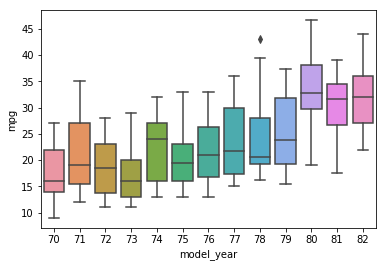

In [17]:
# creating a box plot for model year and mpg
sns.boxplot(x="model_year",y="mpg",data=df)

Now, lets check out the correlation between each feature.

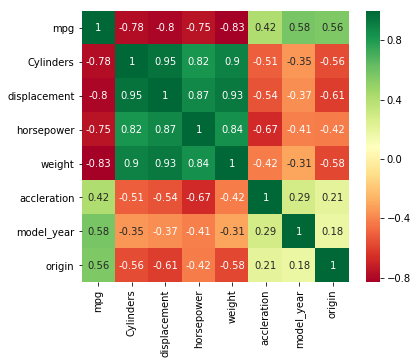

In [18]:
# preparing a heat map to check correlation
corrmat = df.corr()
corrmat
top_corr_features = corrmat.index
plt.figure(figsize=(6,5))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# 4. Descriptive Statistical Analysis

#### Correlation between each feature vs mpg

### Accleration vs mpg

Let's calculate the Pearson correlation coefficient and p value for all features vs mpg

In [19]:
pearson_coef,p_value = stats.pearsonr(df["accleration"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is 0.4202889121016506 with a p value of  1.8230915350787896e-18


Since the p-value< 0.001, the correlation between accleration and mpg is statistically significant, although the linear relationship is not strong (0.420)

### Displacement vs mpg

In [20]:
pearson_coef,p_value = stats.pearsonr(df["displacement"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is -0.804202824805898 with a p value of  1.6558889101928776e-91


Since the p-value is  <  0.001, the correlation between displacement and mpg is statistically significant, and the coefficient of ~ -0.804 shows that the relationship is negative and moderately strong.

### Horsepower vs mpg

In [21]:
pearson_coef,p_value = stats.pearsonr(df["horsepower"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is -0.754276198170877 with a p value of  2.314269904775479e-74


Since the p-value is < 0.001, the correlation between horsepower and mpg is statistically significant, and the coefficient of ~ -0.754 shows that the relationship is negative and moderately strong.

### Weight vs mpg

In [22]:
pearson_coef,p_value = stats.pearsonr(df["weight"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is -0.831740933244335 with a p value of  2.9727995640501474e-103


Since the p-value is < 0.001, the correlation between weight and mpg is statistically significant, and the coefficient of ~ -0.831 shows that the relationship is negative and moderately strong.

### Model_year vs mpg

In [23]:
pearson_coef,p_value = stats.pearsonr(df["model_year"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is 0.5792671330833095 with a p value of  4.844935813366112e-37


Since the p-value is  <  0.001, the correlation between model_year and mpg is statistically significant, but the linear relationship is only moderate (~0.579).

### Origin vs mpg

In [24]:
pearson_coef,p_value = stats.pearsonr(df["origin"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is 0.5634503597738432 with a p value of  1.0114822102336788e-34


Since the p-value is < 0.001, the correlation between origin and mpg is statistically significant, but the linear relationship is only moderate (~0.563).

### Cylinders vs mpg

In [25]:
pearson_coef,p_value = stats.pearsonr(df["Cylinders"],df["mpg"])
print(" The Pearson correlation coefficient is",pearson_coef ,"with a p value of " , p_value)

 The Pearson correlation coefficient is -0.7753962854205543 with a p value of  4.5039922461774475e-81


Since the p-value is < 0.001, the correlation between Cylinders and mpg is statistically significant, and the coefficient of ~ -0.775 shows that the relationship is negative and moderately strong.

# 5. Model Development

Lets create a model using scikitlearn to predict the values of mpg having accleration as the independent feature.

#### Simple Linear Regression

In [26]:
X= df["accleration"].values.reshape(-1,1)  # this will create a numpy array of feature X
Y=df["mpg"].values.reshape(-1,1)

In [27]:
#Splitting the data into train and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [28]:
# printing the shapes of train and test set
print("shape of X_train :",X_train.shape)
print("shape of Y_train :",Y_train.shape)
print("Shape of X_test :" ,X_test.shape)
print("Shape of Y_test :",Y_test.shape)

shape of X_train : (318, 1)
shape of Y_train : (318, 1)
Shape of X_test : (80, 1)
Shape of Y_test : (80, 1)


In [29]:
# Creating a model object
lm1=LinearRegression()

In [30]:
# fitting a model
lm1.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# prediction using a model
Y_pred = lm1.predict(X_test)

#### Multiple linear regression

Here, we will consider more than two features, as independent variables.

In [32]:
X = df[["accleration","weight","Cylinders","origin","horsepower","model_year"]]
Y = df[["mpg"]]

In [33]:
# Splitting data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.20 ,random_state =42)

In [34]:
# shape after splitting:
print("X_train:",X_train.shape)
print("Y_train:",Y_train.shape)
print("X_test:" ,X_test.shape)
print("Y_test:",Y_test.shape)

X_train: (318, 6)
Y_train: (318, 1)
X_test: (80, 6)
Y_test: (80, 1)


In [35]:
#model
lr = LinearRegression()

In [36]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
yhat = lr.predict(X_test)

## 5.Model Evaluation

lets use the evaluation metrics MSE and Rsquared to check the accuracy of model.

In [38]:
# for Simple linear regression:
print("Mean squared error : ", mean_squared_error(Y_test,Y_pred))
print("R score : ", r2_score(Y_test,Y_pred))

Mean squared error :  38.509179200895026
R score :  0.2837692710354305


In [39]:
# for multiple linear regression:
print("Mean squared error : ", mean_squared_error(Y_test,yhat))
print("R score : ", r2_score(Y_test,yhat))

Mean squared error :  8.692046948781746
R score :  0.8383369562398899


Hence, the less MSE and more the value of R-squared(0-1), the better will be the model.